In [2]:
# import library
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# cross validation using statsmodel preparation
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

Data Preparation

In [3]:
# import csv
salary = "/content/drive/MyDrive/Salary Prediction/Salary.csv"

# store data kedalam dataframe pandas
df_salary = pd.read_csv(salary)
df_salary.rename(columns = {'Education Level':'EducationLevel', 'Job Title':'JobTitle', 'Years of Experience':'YearsOfExperience'}, inplace=True)

df_salary

,Age,Gender,EducationLevel,JobTitle,YearsOfExperience,Salary,Country,Race
0,32,Male,Bachelor Degree,Software Engineer,5.0,90000,UK,White
1,28,Female,Master Degree,Data Analyst,3.0,65000,USA,Hispanic
2,45,Male,Phd,Senior Manager,15.0,150000,Canada,White
3,36,Female,Bachelor Degree,Sales Associate,7.0,60000,USA,Hispanic
4,52,Male,Master Degree,Director,20.0,200000,USA,Asian
...,...,...,...,...,...,...,...,...
6679,49,Female,Phd,Director of Marketing,20.0,200000,UK,Mixed
6680,32,Male,High School,Sales Associate,3.0,50000,Australia,Australian
6681,30,Female,Bachelor Degree,Financial Manager,4.0,55000,China,Chinese
6682,46,Male,Master Degree,Marketing Manager,14.0,140000,China,Korean


Check Missing Value

In [4]:
df_salary.isna().sum()

Age                  0
Gender               0
EducationLevel       0
JobTitle             0
YearsOfExperience    0
Salary               0
Country              0
Race                 0
dtype: int64

In [5]:
df_salary.shape

(6684, 8)

Check Duplicated Data

In [6]:
df_salary.duplicated().sum()

1536

In [7]:
df_salary[df_salary.duplicated(keep=False)]

,Age,Gender,EducationLevel,JobTitle,YearsOfExperience,Salary,Country,Race
168,31,Female,Bachelor Degree,HR Coordinator,4.0,50000,China,Korean
211,28,Male,Bachelor Degree,Business Development Associate,2.0,40000,USA,Asian
252,28,Male,Bachelor Degree,Business Development Associate,2.0,40000,USA,Asian
281,29,Female,Bachelor Degree,Business Development Associate,1.5,35000,Australia,White
284,33,Male,Bachelor Degree,Business Analyst,4.0,60000,Canada,Black
...,...,...,...,...,...,...,...,...
6663,51,Female,Master Degree,Content Marketing Manager,19.0,190000,UK,White
6664,37,Male,Bachelor Degree,Sales Director,7.0,90000,China,Chinese
6672,24,Male,Bachelor Degree,Sales Executive,1.0,35000,Canada,Asian
6677,51,Female,Master Degree,Senior Product Marketing Manager,19.0,190000,UK,White


In [8]:
df_salary = df_salary.drop_duplicates(keep="first")
df_salary.duplicated().sum()

0

In [9]:
df_salary

,Age,Gender,EducationLevel,JobTitle,YearsOfExperience,Salary,Country,Race
0,32,Male,Bachelor Degree,Software Engineer,5.0,90000,UK,White
1,28,Female,Master Degree,Data Analyst,3.0,65000,USA,Hispanic
2,45,Male,Phd,Senior Manager,15.0,150000,Canada,White
3,36,Female,Bachelor Degree,Sales Associate,7.0,60000,USA,Hispanic
4,52,Male,Master Degree,Director,20.0,200000,USA,Asian
...,...,...,...,...,...,...,...,...
6678,37,Male,Bachelor Degree,Sales Representative,6.0,75000,Canada,Asian
6679,49,Female,Phd,Director of Marketing,20.0,200000,UK,Mixed
6680,32,Male,High School,Sales Associate,3.0,50000,Australia,Australian
6681,30,Female,Bachelor Degree,Financial Manager,4.0,55000,China,Chinese


Data Description

In [10]:
df_salary.describe()

,Age,YearsOfExperience,Salary
count,5148.000000,5148.000000,5148.000000
mean,34.001166,8.336636,114272.010878
std,7.762879,6.233548,52458.684724
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,113448.500000
75%,39.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [11]:
df_salary["Gender"].value_counts()

Male      2808
Female    2340
Name: Gender, dtype: int64

In [12]:
df_salary["EducationLevel"].value_counts()

Bachelor Degree    2254
Master Degree      1481
Phd                1077
High School         336
Name: EducationLevel, dtype: int64

In [13]:
df_salary["Country"].value_counts()

USA          1076
UK           1056
Australia    1021
China        1009
Canada        986
Name: Country, dtype: int64

In [14]:
df_salary["Race"].value_counts()

White               1514
Asian               1223
Australian           358
Korean               339
Chinese              332
Black                328
African American     266
Welsh                265
Hispanic             262
Mixed                261
Name: Race, dtype: int64

In [15]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 6682
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5148 non-null   int64  
 1   Gender             5148 non-null   object 
 2   EducationLevel     5148 non-null   object 
 3   JobTitle           5148 non-null   object 
 4   YearsOfExperience  5148 non-null   float64
 5   Salary             5148 non-null   int64  
 6   Country            5148 non-null   object 
 7   Race               5148 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 362.0+ KB


Correlation in Numerical Variables

In [16]:
df_salary[["Age","YearsOfExperience", "Salary"]].corr()

,Age,YearsOfExperience,Salary
Age,1.000000,0.936752,0.74298
YearsOfExperience,0.936752,1.000000,0.81603
Salary,0.742980,0.816030,1.00000


Korelasi antara usia, lama pengalaman kerja, dan gaji memiliki hasil positif dan berkorelasi kuat.

**Perbandingan Salary antar gender**



In [17]:
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female    106818.066239
Male      120483.631410
Name: Salary, dtype: float64

Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.

**Perbandingan Salary antar education level**



In [18]:
df_salary.groupby("EducationLevel")["Salary"].mean()

EducationLevel
Bachelor Degree     93105.807453
High School         35987.110119
Master Degree      128304.246455
Phd                163696.902507
Name: Salary, dtype: float64

Rata-rata gaji semakin besar seiring dengan level pendidikan yang lebih tinggi.

**Perbandingan Salary antar country**



In [19]:
df_salary.groupby("Country")["Salary"].mean()

Country
Australia    114177.376102
Canada       115716.535497
China        115513.882061
UK           114553.724432
USA          111597.088290
Name: Salary, dtype: float64

Rata-rata gaji terbesar dimiliki oleh pegawai yang berasal dari Canada, sedangkan rata-rata gaji terkecil dimiliki oleh pegawai yang berasal dari USA

**Perbandingan Salary antar race**



In [20]:
df_salary.groupby("Race")["Salary"].mean()

Race
African American    111788.699248
Asian               114147.919052
Australian          113187.128492
Black               118190.993902
Chinese             112469.891566
Hispanic            109450.629771
Korean              117331.864307
Mixed               114959.796935
Welsh               110802.622642
White               115249.142668
Name: Salary, dtype: float64

Rata-rata gaji terbesar dimiliki oleh pegawai yang memiliki ras Black, sedangkan rata-rata gaji terkecil dimiliki oleh pegawai yang memiliki ras Hispanic

Numerical Variables with Each Categorical Variable

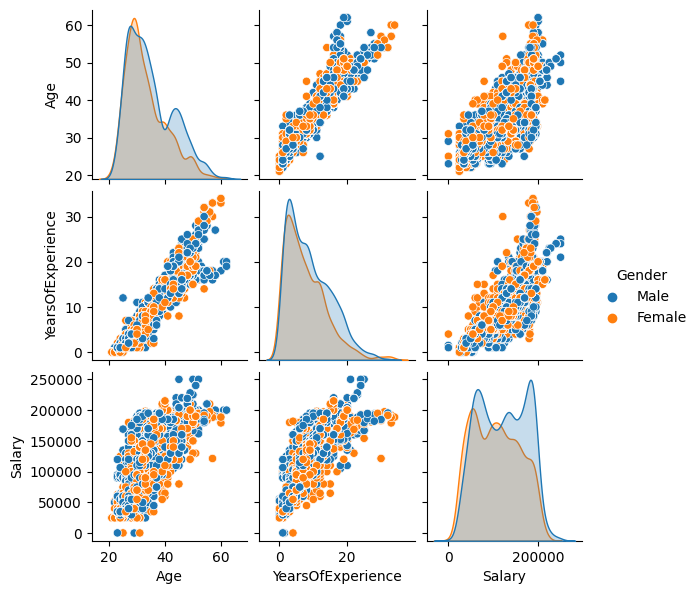

In [21]:
sns.pairplot(data = df_salary, hue = "Gender", height=2)

*   Semakin lama pengalaman kerja seseorang, semakin tinggi gajinya.
*   Semakin tua usia seseorang, semakin lama pula pengalaman kerja yang dimiliki
*   Jenis kelamin tidak terlalu berdampak signifikan pada gaji.

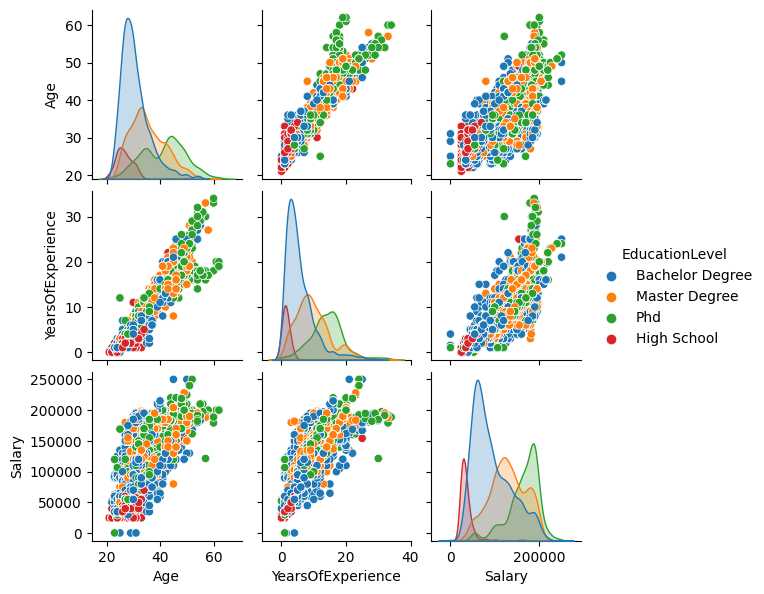

In [22]:
sns.pairplot(data = df_salary, hue = "EducationLevel", height=2, palette="tab10")


*   Semakin tinggi tingkat pendidikan seseorang, semakin tinggi gajinya.
*   Tingkat pendidikan yang tinggi cenderung dimiliki seseorang dengan usia yang lebih tua.
*   Tingkat pendidikan yang tinggi cenderung dimiliki oleh seseorang dengan lama pengalaman kerja yang tinggi pula.

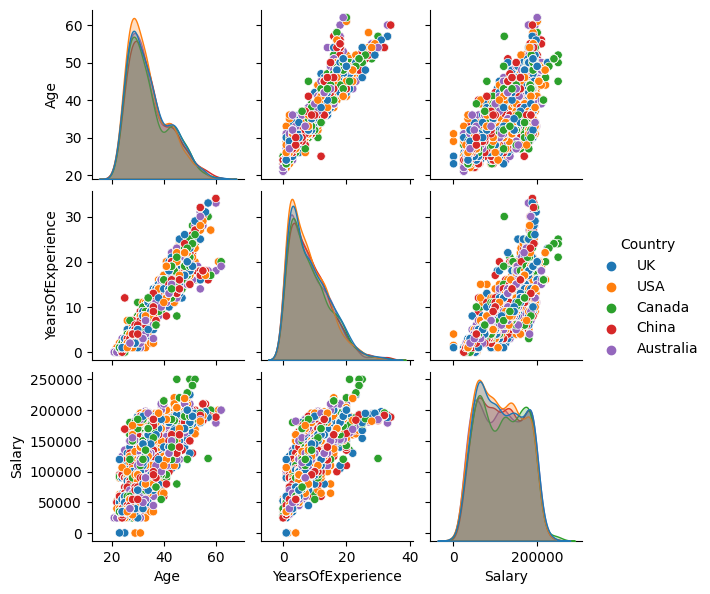

In [23]:
sns.pairplot(data = df_salary, hue = "Country", height=2, palette="tab10")




*   Country pegawai tidak terlalu berdampak signifikan pada gaji.



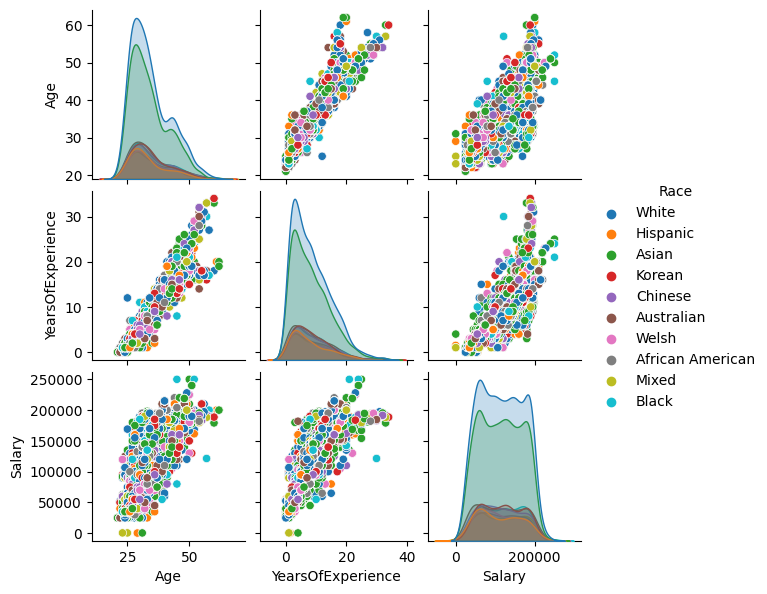

In [24]:
sns.pairplot(data = df_salary, hue = "Race", height=2, palette="tab10")




*   Race pegawai tidak terlalu berdampak signifikan pada gaji.



Uji Statistik

$H_0$: Rata-rata gaji laki-laki sama dengan dari rata-rata gaji perempuan.


$$ H_0 :\mu_A = \mu_B $$


$H_1$: Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.

$$ H_0 :\mu_A > \mu_B $$

In [25]:
sig_level = 0.1

Preanalysis

In [26]:
# Menghitung rerata salary laki-laki dan perempuan
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female    106818.066239
Male      120483.631410
Name: Salary, dtype: float64

Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.

Analysis

Standar Deviasi populasi tidak diketahui. Melakukkan uji variansi untuk lanjut menggunakan uji t-test.

In [27]:
# Gaji Laki-laki
df_male = df_salary[df_salary["Gender"]=="Male"]["Salary"].values

# Gaji Perempuan
df_female = df_salary[df_salary["Gender"]=="Female"]["Salary"].values

# Variansi
np.var(df_male), np.var(df_female)


(2747334752.640851, 2654369825.7507405)

Dapat disimpulkan bahwa variansi tidak sama.

In [28]:
from scipy import stats
result = stats.ttest_ind(a = df_male,
                         b = df_female,
                         equal_var=False,
                         alternative = "greater")

In [29]:
result.pvalue

4.052466560046682e-21

In [30]:
result.statistic

9.39980292291224

In [31]:
# Menentukan aturan keputusan
if result.pvalue < sig_level:
    print("Tolak hipotesis nol.")
else:
    print("Gagal menolak hipotesis nol.")

Tolak hipotesis nol.


Terdapat cukup bukti bahwa rata-rata gaji laki-laki dan perempuan tidak sama. Rata-rata gaji laki-laki lebih tinggi dan rata-rata gaji perempuan.

Derajat Kebebasan

In [32]:
df_data = len(df_male)+len(df_female)-2
df_data

5146

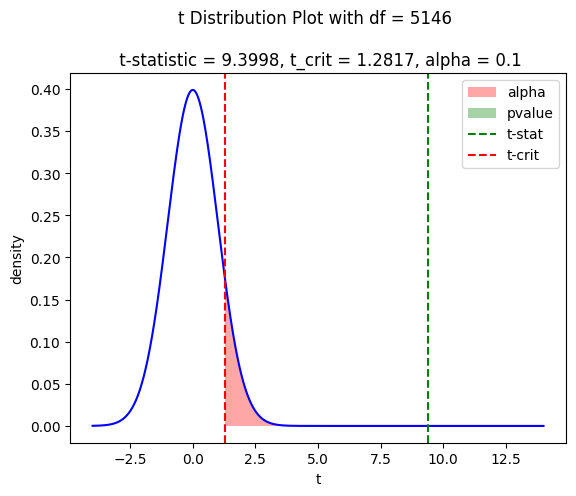

In [33]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-sig_level, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-sig_level, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = {sig_level}');


Confidence Level

In [34]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=df_male),
                  d2 = DescrStatsW(data=df_female))

lower, upper = cm.tconfint_diff(alpha=sig_level,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 11273.811569604013 16057.31877227633 ]


Dari hasil yang didapat, disimpulkan bahwa kita 90% yakin bahwa rata-rata gaji laki-laki lebih dari rata-rata gaji perempuan. Dari confidence interval yang didapat, disimpulkan kita 90% yakin bahwa rata-rata perbedaan gaji memiliki interval di 11273 sampai dengan 16057.

Regression Modeling

In [35]:
# Making a function
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

Data Prep

In [36]:
df_salary.drop(["JobTitle", "Country", "Race"],  axis=1, inplace=True)
df_salary.head()

<ipython-input-36-5685f8ea383f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.drop(["JobTitle", "Country", "Race"],  axis=1, inplace=True)


,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32,Male,Bachelor Degree,5.0,90000
1,28,Female,Master Degree,3.0,65000
2,45,Male,Phd,15.0,150000
3,36,Female,Bachelor Degree,7.0,60000
4,52,Male,Master Degree,20.0,200000


Cek Data

In [37]:
df_salary["EducationLevel"].value_counts()

Bachelor Degree    2254
Master Degree      1481
Phd                1077
High School         336
Name: EducationLevel, dtype: int64

In [38]:
df_salary["Gender"].value_counts()

Male      2808
Female    2340
Name: Gender, dtype: int64

Ubah Data Kategorik Menjadi Numerik

In [39]:
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32,Male,Bachelor Degree,5.0,90000
1,28,Female,Master Degree,3.0,65000
2,45,Male,Phd,15.0,150000
3,36,Female,Bachelor Degree,7.0,60000
4,52,Male,Master Degree,20.0,200000


In [40]:
df_salary["EducationLevel"] = df_salary["EducationLevel"].map({"High School":0,"Bachelor Degree":1,"Master Degree":2,"Phd":3})
df_salary["Gender"] = df_salary["Gender"].map({"Male":0,"Female":1})
df_salary.head()

<ipython-input-40-9d4f6d44afb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary["EducationLevel"] = df_salary["EducationLevel"].map({"High School":0,"Bachelor Degree":1,"Master Degree":2,"Phd":3})
<ipython-input-40-9d4f6d44afb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary["Gender"] = df_salary["Gender"].map({"Male":0,"Female":1})


,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32,0,1,5.0,90000
1,28,1,2,3.0,65000
2,45,0,3,15.0,150000
3,36,1,1,7.0,60000
4,52,0,2,20.0,200000


**Single Predictor Modelling**

Melihat hubungan antara lama pengalaman kerja dengan gaji.

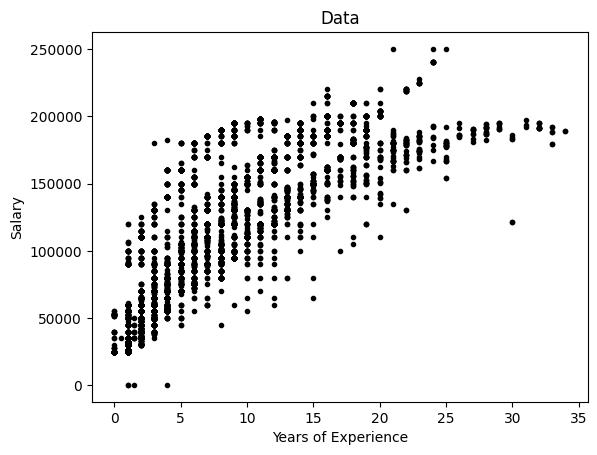

In [41]:
x = df_salary["YearsOfExperience"]
y = df_salary["Salary"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

Terlihat hubungan positif bahwa semakin lama pengalaman bekerja, semakin tinggi gajinya. Variasi gaji lebih besar ketika melihat pengalaman kerja.

Fit Linear Regression - Using Horsepower Variable

In [42]:
# Create OLS model object
model = smf.ols("Salary ~ YearsOfExperience", df_salary)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,57021.528216,705.820923
YearsOfExperience,6867.336597,67.808157


In [43]:
results_model_salary.rsquared

0.665905363290314


$$\text{Salary} = 57021 + 6867\times\text{Years of Experience}$$

Jika membandingkan dua orang yang memiliki 1 tahun perbedaan pada lama pengalaman kerja, diperkirakan orang yang memiliki pengalaman kerja lebih lama memiliki gaji yang lebih besar dengan selisih 6867.

Untuk seseorang yang memiliki lama pengalaman kerja 0 tahun, perkiraan rata-rata gaji yang didapatkan adalah sebesar 57021.

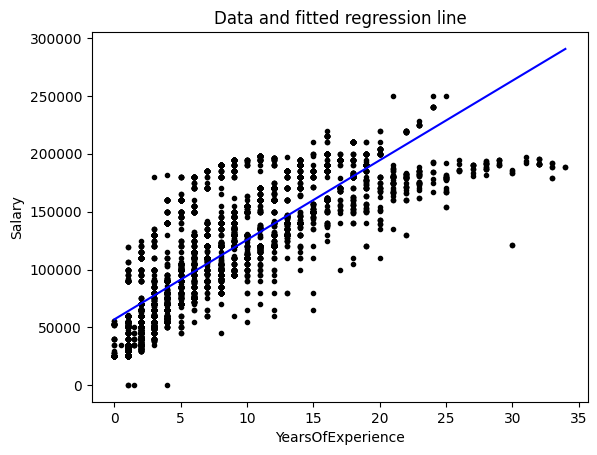

In [44]:
predictor = "YearsOfExperience"
outcome = "Salary"
data = df_salary.copy()
results_ = results_salary.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

Residual Plot

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

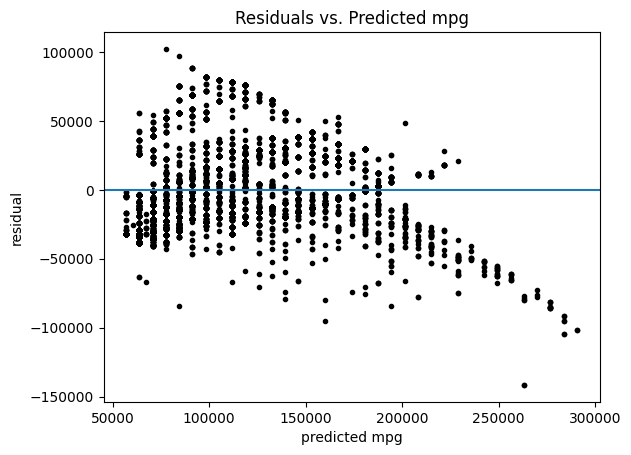

In [45]:
# Residual Plot and Explained Variance
plt.scatter(results_model_salary.fittedvalues, results_model_salary.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [46]:
results_model_salary.rsquared

0.665905363290314

Normality of Error Assuption

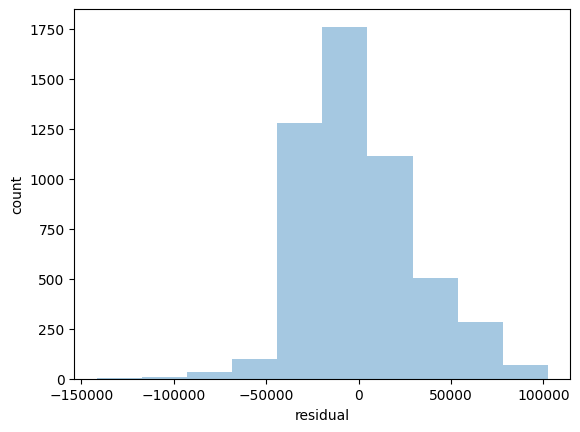

In [47]:
# Normality of Error Assumption

plt.hist(results_model_salary.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

Fit Linear Regression - Using Log Transform on Weight Variable

In [48]:
df_salary["logYOE"] = np.log(df_salary["YearsOfExperience"])
df_salary.loc[df_salary["YearsOfExperience"] == 0, "logYOE"] = 0
df_salary.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-48-039551e60f4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary["logYOE"] = np.log(df_salary["YearsOfExperience"])


,Age,Gender,EducationLevel,YearsOfExperience,Salary,logYOE
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,34.001166,0.454545,1.640831,8.336636,114272.010878,1.787007
std,7.762879,0.497978,0.882762,6.233548,52458.684724,0.896713
min,21.000000,0.000000,0.000000,0.000000,350.000000,-0.693147
25%,28.000000,0.000000,1.000000,3.000000,70000.000000,1.098612
50%,32.000000,0.000000,1.000000,7.000000,113448.500000,1.945910
75%,39.000000,1.000000,2.000000,12.000000,160000.000000,2.484907
max,62.000000,1.000000,3.000000,34.000000,250000.000000,3.526361


In [49]:
# Create OLS model object
model = smf.ols("Salary ~ logYOE", df_salary)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary_log = print_coef_std_err(results_logtransform)
results_logtransform.rsquared

0.7175522228835784

Multiple Predictors Modelling

In [50]:
df_salary.drop("logYOE", axis=1, inplace=True)
df_salary.head()

<ipython-input-50-5e0a07c0d46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.drop("logYOE", axis=1, inplace=True)


,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32,0,1,5.0,90000
1,28,1,2,3.0,65000
2,45,0,3,15.0,150000
3,36,1,1,7.0,60000
4,52,0,2,20.0,200000


In [51]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """

    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None

    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame>
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

Evaluate a model using K-fold cross validation

In [52]:
# Evaluate a model using K-fold cross validation
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df_salary,
                                       y = df_salary["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred,
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.748766,Folds 1
1,0.766698,Folds 2
2,0.756943,Folds 3
3,0.742762,Folds 4
4,0.764109,Folds 5


In [53]:
scores_ols_all_pred["test_rsquared"].mean()

0.7558557364578304

*The model use all media have good fit, it can explain 75% variance of salary. Let's build the model using whole data to infer the estimated coefficient from the model, and gain the insight from business prespective*

Fit Linear Regression - Using All Predictors

In [55]:
# Fitting Model
# Create OLS model object
model = smf.ols("Salary ~ Age + Gender + C(EducationLevel) +  YearsOfExperience + Age:YearsOfExperience", df_salary)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,19494.501234,4069.711833
C(EducationLevel)[T.1],23973.017516,1584.196768
C(EducationLevel)[T.2],31291.301858,1768.592168
C(EducationLevel)[T.3],45163.927749,1911.352848
Age,136.055804,147.312731
Gender,-5918.723548,739.076872
YearsOfExperience,15127.209344,341.928560
Age:YearsOfExperience,-189.232808,7.129499




$\text{Salary for High School} = 19494 + 136\times\text{Age} - 5918\times\text{Gender} + 15127\times\text{YearsOfExperience}$


$\text{Salary for Bachelor Degree} = 19494 + 23973 + 136\times\text{Age} - 5918\times\text{Gender} + 15127\times\text{YearsOfExperience}$


$\text{Salary for Master Degree} = 19494 + 31291 + 136\times\text{Age} - 5918\times\text{Gender} + 15127\times\text{YearsOfExperience}$


$\text{Salary for PhD} = 19494 + 45163 + 136\times\text{Age} - 5918\times\text{Gender} + 15127\times\text{YearsOfExperience}$